# TP Semana 6
  
Para el siguiente cuadripolo se pide calcular los parámetros Z.  <p style="text-align: center;">      
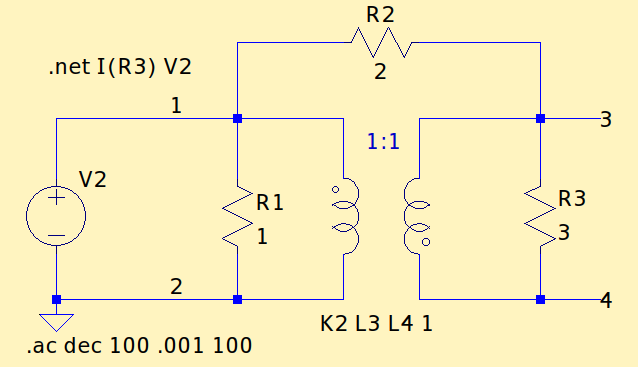  

Bonus:  
  
    +1 💎 Simular en SPICE los parámetros de cuadripolo con la directiva .net
    +1 🎓 Verifique mediante el módulo de simulación simbólica SymPy la impedancia de entrada 
    +1 🤯 Presentación en jupyter notebook

### Trafo ideal:
1- $V_1 = a.V_2$  
2- $I_x = \frac{1}{a}(-I_y)$  

Siendo $I_x$ la corriente que atraviesa el lado izquierdo del transformador y $I_y$ la corriente que pasa por el lado derecho del transformador.
### Corrientes:
3- $V_1.G_1+(V_1.-V_2).G_2 = I_1-I_x$  
4- $V_2.G_3+(V_2-V_1).G_2 = I_2-I_y$

### Desarrollo algebraico:
Utilizo ambas ecuaciones desarrolladas arriba. Reemplazare $V_2 = \frac{1}{a}.V_1$ y $I_y = -a.I_x$.  

$V_1.G_1+(V_1.-V_1.\frac{1}{a}).G_2 = I_1-I_x$  
$\frac{1}{a}V_1.G_3+(\frac{1}{a}.V_1-V_1).G_2 = I_2-(-a.I_x)$  
  
#### Cociderando un $a = 1$
$V_1.G_1 = I_1-I_x$  
$V_1.G_3 = I_2+I_x$  

#### Sumo las ecuaciones:
$I_1 + I_2 = V_1.(G_1+G_3)$  

#### Rescribo:
$\frac{V_1}{I_1 + I_2}=\frac{1}{G_1+G_3}$

Teniendo esta ecuacion obtengo la matiz $Z$:  
$(I_2 = 0) \Rightarrow Z_{11} = \frac{1}{G_1+G_3}$  
$(I_1 = 0) \Rightarrow Z_{12} = \frac{1}{G_3+G_1}$  
  
Dado que para un $a = 1$ se puede decir que $V_1 = V_2$ se puede decir que $Z_{11} = Z_{21}$ y $Z_{12} = Z_{22}$.  

#### Matriz:
$$ Z =
\left(\begin{array}
 .\frac{1}{G_1+G_3} & \frac{1}{G_3+G_1}\\
\frac{1}{G_1+G_3} & \frac{1}{G_3+G_1}
\end{array}\right)
 = \left(\begin{array}
 .3/4 & 3/4\\
3/4 & 3/4
\end{array}\right)
$$ 

## Otra resolucion pero con cuadripolos:
Para poder solucionar este ejercicio utilizando cuadripolos tendremos que darnos cuenta que no cae ninguna tension en la resistensia $R_2$ debido a que la tension de un lado del transformador y del otro son iguales y por lo tanto no la vamos a considerar en este analisis. Otra concideracion que vamos a hacer es representar el transformador en una red T, de esta forma quedaria una red T con una impedancia en paralelo de cada lado.

#### Matriz:
<p style="text-align: center;">  
$Z_a = s(L_1-M) |---|  Z_b = -sM |---|  Z_c = s(L_2-M)$
$$ T_{T} =
\left(\begin{array}
 .\frac{Z_a}{Z_b}+1& Z_a+Z_c.(\frac{Z_a}{Z_b}+1)\\
 \frac{1}{Z_b}& 1+\frac{Z_c}{Z_b}
\end{array}\right)
 = \left(\begin{array}
 .\frac{(L_1-M)}{-M}+1 & s.(L_1-M)+s.(L_2-M).(\frac{(L_1-M)}{-M}+1)\\
\frac{1}{-s.M} & 1+\frac{(L_2-M)}{-M}
\end{array}\right)
$$ 


<p style="text-align: center;">  
$$ T_{T} =
\left(\begin{array}
 .2-\frac{L_1}{M}& s.((L_1-M)+(L_2-M).(2-\frac{L_1}{M})\\
 \frac{1}{-s.M}& 2-\frac{L_2}{M}
\end{array}\right)
$$

Con esta matriz $T$ obtendremos una matriz T equivalente utilizando multiplicando por las dos resistencias.

In [25]:
###---------------------------------------------------
from pytc2.general import print_subtitle
from pytc2.cuadripolos import Tabcd2Z_s, Z2Tabcd_s
import sympy as sp
from sympy import collect, simplify
from scipy import signal

s = sp.symbols('s',complex=True)
#Za, Zb, Zc = sp.symbols('Za, Zb, Zc',complex=True)
#L1, L2, M = sp.symbols('L1, L2, M',complex=True)
L1 = 1
L2 = 1
M = 1
Za = s*(L1-M)
Zb = -s*M
Zc = s*(L2-M)

#R1, R3 = sp.symbols('R1, R3',complex=True)
R1 = 1
R3 = 3

#Matriz trafo equivalente
T1 = sp.Matrix([[1,Za],[0,1]])
T2 = sp.Matrix([[1,0],[1/Zb,1]])
T3 = sp.Matrix([[1,Zc],[0,1]])
T = T1*T2*T3

#Defino las dos impedancias en paramentros T
Tr1 = sp.Matrix([[1,0],[1/R1,1]])
Tr3 = sp.Matrix([[1,0],[1/R3,1]])
Tt = Tr1*T*Tr3
print_subtitle("Matriz T equivalente")
display(Tt)

print_subtitle("Mariz Z equivalente")
Zt = Tabcd2Z_s(Tt)
display(Zt)

#### Matriz T equivalente

Matrix([
[                     1, 0],
[1.33333333333333 - 1/s, 1]])

#### Mariz Z equivalente

Matrix([
[s/(1.33333333333333*s - 1), s/(1.33333333333333*s - 1)],
[s/(1.33333333333333*s - 1), s/(1.33333333333333*s - 1)]])

Como se puede observar este circuito un poco menos idelaisado filtra las bajas frecrecuencias pero para altas frecuencias posee el mismo comportamiento que el transformador ideal.

#### Tf:

s/(1.33333333333333*s - 1)

(1,
 array([<Axes: title={'center': 'Magnitude response'}, ylabel='Magnitude [dB]'>,
        <Axes: title={'center': 'Phase response'}, xlabel='Angular frequency [rad/sec]', ylabel='Phase [rad]'>],
       dtype=object))

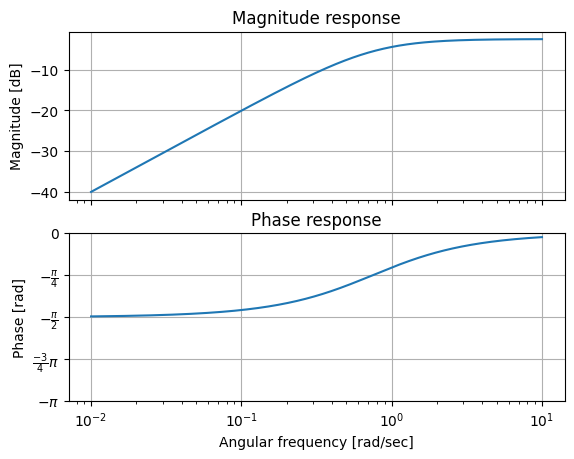

In [27]:
from pytc2.sistemas_lineales import bodePlot
##Denominador y Numerador
b = [1,0]
a = [4/3, -1]

#Tf
tf = signal.TransferFunction(b,a)
print_subtitle("Tf:")
display(Zt[0,0])

#Plot
bodePlot(tf)

# Ejercicio 2: <p style="text-align: center;">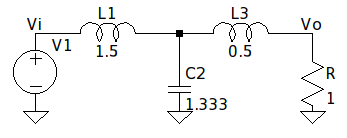  
👉 Obtener la transferencia de tensión $\frac{V_o}{V_i}$ por método de cuadripolos (se sugiere referirse a alguno de los métodos de interconexión ya vistos). Ayuda: si $C_2 = \frac{4}{3}$ (se utilizó 1.333 para la simulación), los polos de la transferencia están ubicados sobre una circunferencia de radio unitario

👉 Construya la matriz de admitancia indefinida (MAI) del circuito.

👉 Compute la transferencia de tensión con la MAI.

Para obtener la transferencia utilizando el metodo de cuadripolos podemos separar el circuito en dos impedancias de igual complegitud, en este caso vamos a optar por dos impednacias en L, estas la podremos calcular rapidamente tomando utilizando la matriz de impedancia de una red tipo T y igualar a cero impedancia derecha. Luego de obtener la matriz impedancia de cada red L obtendremos la matriz T de cada red y obtendremos una matriz T equivalente. Otra forma de poder resolver este circuito es obtener la matriz T de cada admitancia e impedancia y obtener su matriz T equivalente.
$$ Z_{T1} =
\left(\begin{array}
 .Za+Zb & Zb\\
Zb & Zc+Zb
\end{array}\right)
 = \left(\begin{array}
 .L1.s+\frac{1}{C.s} & \frac{1}{C.s}\\
 \frac{1}{C.s} & \frac{1}{C.s}
\end{array}\right)
 = \left(\begin{array}
 .\frac{3}{2}.s+\frac{3}{4.s} & \frac{3}{4.s}\\
 \frac{3}{4.s} & \frac{3}{4.s}
\end{array}\right)
$$ 

$$ Z_{T2} =
\left(\begin{array}
 .Za+Zb & Zb\\
Zb & Zc+Zb
\end{array}\right)
 = \left(\begin{array}
 .L2.s+R & R\\
 R & R
\end{array}\right)
 = \left(\begin{array}
 .\frac{1}{2}.s+1 & 1\\
 1 & 1
\end{array}\right)
$$ 

$Z_{eq} = Y^{-1}_{imp}+Y^{-1}_{\pi}$

Sabiendo que este nuevo cuadripolo Z no se encuentra cargado podemos decir que su transferecncia se podra obtener de la siguiente forma: $T(s) =  \frac{Z_{21}}{Z_{11}}$

In [1]:
###---------------------------------------------------
from pytc2.general import print_subtitle
import sympy as sp
from sympy import collect, simplify
from scipy import signal
from pytc2.cuadripolos import Tabcd2Y_s, Y2Tabcd_s

s = sp.symbols('s',complex=True)
#R, C, L1, L2 = sp.symbols('R, C, L1, L2',complex=True)
R = 1
C = 4/3
L1 = 3/2
L2 = 1/2

Zt1 = sp.Matrix([[L1*s+1/(s*C),1/(s*C)],[1/(s*C),1/(s*C)]])
Zt2 = sp.Matrix([[L2*s+R,R],[R,R]])
from pytc2.cuadripolos import Z2Tabcd_s

print_subtitle('T1:')
T1 = Z2Tabcd_s(Zt1)
display(T1)
print_subtitle('T2:')
T2 = Z2Tabcd_s(Zt2)
display(T2)

T = T1*T2
print_subtitle('T:')
display(T)
tf = 1/T[0,0]

print_subtitle('Transferencia:')
display(simplify(collect(tf,s)))

#### T1:

Matrix([
[    2.0*s**2 + 1.0, 1.5*s],
[1.33333333333333*s,   1.0]])

#### T2:

Matrix([
[0.5*s + 1, 0.5*s],
[        1,     1]])

#### T:

Matrix([
[1.5*s + (0.5*s + 1)*(2.0*s**2 + 1.0), 0.5*s*(2.0*s**2 + 1.0) + 1.5*s],
[1.33333333333333*s*(0.5*s + 1) + 1.0,   0.666666666666667*s**2 + 1.0]])

#### Transferencia:

1/(1.5*s + (0.5*s + 1)*(2.0*s**2 + 1.0))

## Otra forma de obtener la transferencia utlizando cuadripolos:

In [2]:
T1 = sp.Matrix([[1,L1*s],[0,1]])
print_subtitle('T1')
display(T1)
T2 = sp.Matrix([[1,0],[s*C,1]])
print_subtitle('T2')
display(T2)
T3 = sp.Matrix([[1,L2*s],[0,1]])
print_subtitle('T3')
display(T3)
T4 = sp.Matrix([[1,0],[1/R,1]])
print_subtitle('T4')
display(T4)

T = T1*T2*T3*T4
print_subtitle('T')
display(T)
A = 1/T[0,0]
display(simplify(collect(A,s)))

Y = Tabcd2Y_s(T)
print_subtitle('Y')
display(Y)

#### T1

Matrix([
[1, 1.5*s],
[0,     1]])

#### T2

Matrix([
[                 1, 0],
[1.33333333333333*s, 1]])

#### T3

Matrix([
[1, 0.5*s],
[0,     1]])

#### T4

Matrix([
[  1, 0],
[1.0, 1]])

#### T

Matrix([
[      2.0*s**2 + 0.5*s*(2.0*s**2 + 1) + 1.5*s + 1, 0.5*s*(2.0*s**2 + 1) + 1.5*s],
[0.666666666666667*s**2 + 1.33333333333333*s + 1.0,   0.666666666666667*s**2 + 1]])

1/(2.0*s**2 + s*(1.0*s**2 + 2.0) + 1)

#### Y

Matrix([
[(0.666666666666667*s**2 + 1)/(s*(1.0*s**2 + 2.0)),                                -1/(s*(1.0*s**2 + 2.0))],
[                          -1/(s*(1.0*s**2 + 2.0)), (1.0*s**3 + 2.0*s**2 + 2.0*s + 1)/(s*(1.0*s**2 + 2.0))]])

(1,
 array([<Axes: title={'center': 'Magnitude response'}, ylabel='Magnitude [dB]'>,
        <Axes: title={'center': 'Phase response'}, xlabel='Angular frequency [rad/sec]', ylabel='Phase [rad]'>],
       dtype=object))

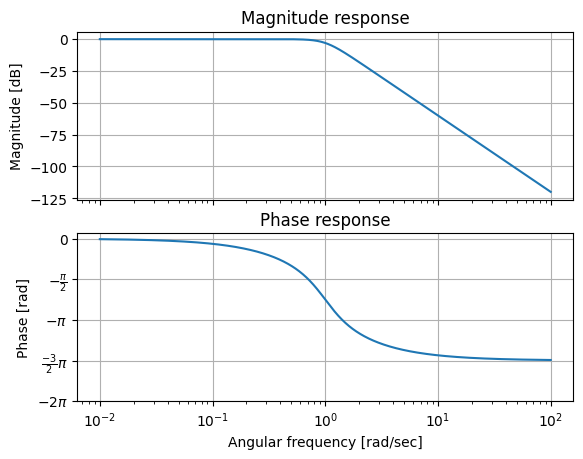

In [62]:
from pytc2.sistemas_lineales import bodePlot
##Denominador y Numerador
b = [1]
a = [ 1, 2, 2, 1]

#Tf
tf = signal.TransferFunction(b,a)

#Plot
bodePlot(tf)

## Resultados Simulacion LTspice
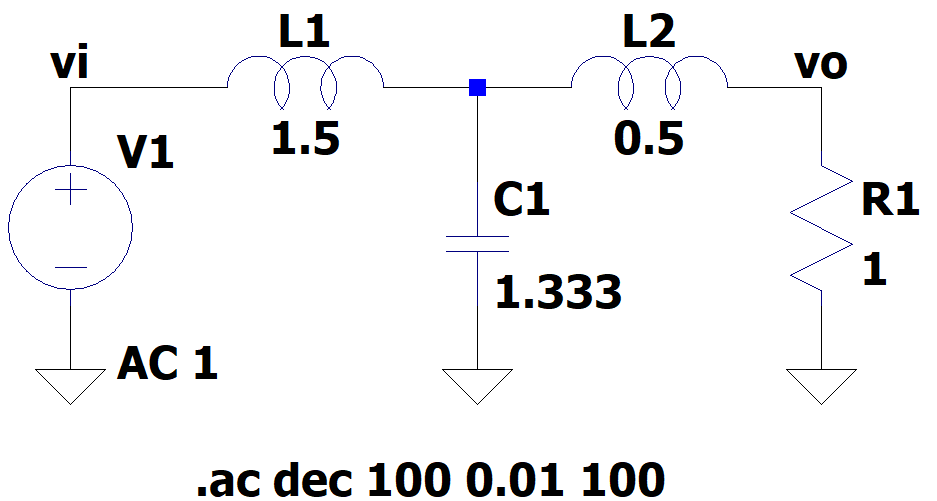
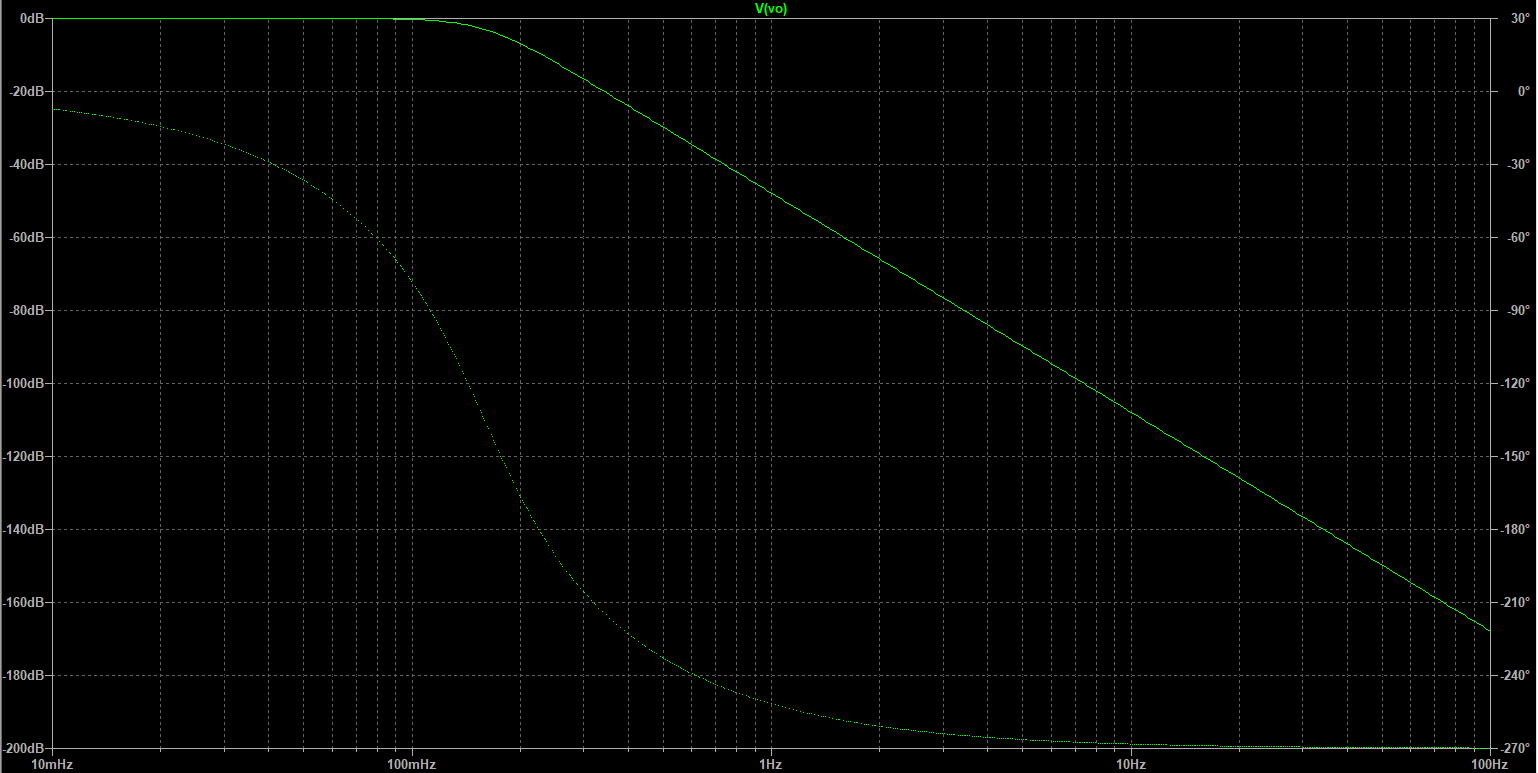

Como se puede obserbar en el grafico simulado se obtuvo la misma respuesta que la obtenida con los conceptos de cuadripolos

In [16]:
from pytc2.cuadripolos import may2y
s = sp.symbols('s',complex=True)

L1,L3,C2,R = sp.symbols('L1,L3,C2,R',complex=True)

mai = sp.Matrix([[1/(s*L1),-1/(s*L1),0,0],
                 [-1/(s*L1),s*C2+1/(s*L1)+1/(s*L3),-1/(s*L3),-s*C2],
                [0,-1/(s*L3),1/R+1/(s*L3),-1/R],
                [0,-s*C2,-1/R,s*C2+1/R]])
print_subtitle('RED MAI')
display(mai)

#### RED MAI

Matrix([
[ 1/(L1*s),                  -1/(L1*s),              0,          0],
[-1/(L1*s), C2*s + 1/(L3*s) + 1/(L1*s),      -1/(L3*s),      -C2*s],
[        0,                  -1/(L3*s), 1/R + 1/(L3*s),       -1/R],
[        0,                      -C2*s,           -1/R, C2*s + 1/R]])